## Introducción
El estudio trata de identificar la relación existente entre el PIB de los países de la unión europea y el nivel de desigualdad de dichos países. Los datos de PIB se extraen del banco mundial, al igual que los del índice de desigualdad. Dichos datos marcan series temporales que van desde el año 1960 hasta el 2021. 

El PIB es la abreviatura de "Producto Interno Bruto". Es un indicador económico que mide el valor de todos los bienes y servicios finales producidos en un país durante un período de tiempo específico, por lo general un año. El PIB es una medida importante de la salud económica de un país, ya que refleja la producción económica total y el gasto en bienes y servicios finales.

El PIB incluye la producción de bienes y servicios realizada tanto por empresas nacionales como extranjeras dentro del territorio del país. Además, el PIB incluye la inversión realizada en la economía, tanto pública como privada, así como el gasto de los consumidores y del gobierno en bienes y servicios.. Los datos de PIB se ofrecen en US$". Esta nomenclatura es la abreviatura para "dólar estadounidense a precios actuales". Se refiere a la valoración de una cantidad en dólares estadounidenses utilizando el valor actual de la moneda en el mercado. En otras palabras, "US$ a precios actuales" significa que la cantidad en cuestión se ha convertido a dólares estadounidenses utilizando el tipo de cambio actual. El valor de los dólares estadounidenses a precios actuales puede variar con el tiempo debido a los cambios en el tipo de cambio y la inflación. Esta cuestión permite comparar los resultados de manera homoghénea.

El índice de GINI es una medida de desigualdad económica que se utiliza para medir la distribución de los ingresos o la riqueza en una población determinada. El índice de GINI varía de 0 a 1, donde 0 representa una distribución completamente equitativa, es decir, todos tienen los mismos ingresos o riqueza, mientras que 1 representa una distribución completamente desigual, es decir, una sola persona tiene todos los ingresos o riqueza.

El índice de GINI se calcula utilizando los ingresos o la riqueza de una muestra representativa de la población y mide la proporción de la brecha entre los ingresos o la riqueza promedio y la distribución real de los mismos. Cuanto más cercano a 1 sea el índice de GINI, mayor es la desigualdad económica. En este caso los valores se expresan entre 0 y 100, siendo 0 la "ausencia de desigualdad" y 100 "la desigualdad absoluta".

## Importación
Para llevar a cabo el trabajo se realizan las importaciones de las librerías necesarias. Estas acciones son:
- Operar son series y realizar cálculos matemáticos.
- Creación de dataframes.
- Tratamiento y limpieza de datos.
- Creación de gráficos.
- Llevar a cabo análisis y pruebas estadísticas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

## Conexión
Tras la importanción se llevan a cabo las principales acciones relacionadas con ETL (Extract, transform y load) de los datos. Estas son:
- Conexión de bases de datos (GINI, PIB, PAISES)
- Información y descripción para la identificación de tipos de datos y razones estadísticas descriptivas principales.
- Eliminación de datos y columnas no necesarias.
- Denominación de índices (Columna: Country Name)
- Transposición para limpiezas de NaN mediante el dato siguiente. Ha sido necesaria la elección del elemento siguiente por la ausencia de datos anteriores en muchos casos.
- Transposición a su estado original.  
Nota: estas acciones se realizan sobre las bases de datos GINI y PIB.

In [3]:
GINI = pd.read_excel('C:/Users/jegar/OneDrive/Documentos/CLIENTES/BRIDGE/EDA_José Enrique García/src/Data/Raw/Gini.xlsx', header=0)

In [4]:
GINI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            1 non-null      float64
 13  1969            1 non-null      float64
 14  1970            2 non-null      float64
 15  1971            2 non-null      float64
 16  1972            1 non-null      float64
 17  1973            1 non-null      flo

In [5]:
GINI.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,85.000000,77.000000,83.000000,85.000000,83.000000,76.000000,88.000000,69.000000,50.000000,18.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,36.310588,36.458442,36.551807,36.729412,36.178313,35.507895,35.754545,35.052174,34.974000,40.866667
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.231891,7.255240,7.996422,7.752969,7.441086,6.994164,6.764170,7.109079,7.245007,7.451332
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,24.700000,24.600000,24.000000,25.400000,24.800000,23.200000,24.600000,23.200000,24.000000,25.700000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,30.500000,30.800000,31.050000,31.400000,31.200000,30.225000,30.275000,30.000000,29.425000,38.050000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,35.500000,36.200000,35.100000,35.600000,34.800000,35.150000,35.150000,34.200000,34.650000,40.750000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,41.100000,40.700000,40.850000,41.100000,40.850000,40.475000,39.900000,39.700000,39.675000,45.075000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8,27.9,...,53.400000,52.700000,63.000000,59.100000,54.600000,53.300000,53.900000,53.500000,53.500000,52.900000


In [6]:
GINI['Country Name'] = GINI['Country Name'].replace('República Eslovaca', 'Eslovaquia')

In [7]:
GINI = GINI.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [8]:
GINI = GINI.set_index('Country Name')

In [9]:
GINI = GINI.transpose()

In [10]:
GINI

Country Name,Aruba,NaN,Afganistán,NaN,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,NaN,33.1,NaN,NaN,NaN,41.1,...,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,44.3
2018,NaN,NaN,NaN,NaN,51.3,30.1,NaN,NaN,26.0,41.3,...,NaN,35.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,30.1,NaN,NaN,NaN,42.9,...,NaN,NaN,32.3,NaN,NaN,NaN,NaN,NaN,NaN,50.3
2020,NaN,NaN,NaN,NaN,NaN,29.4,NaN,NaN,NaN,42.3,...,NaN,36.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
GINI = GINI.fillna(method='ffill')

In [12]:
GINI

Country Name,Aruba,NaN,Afganistán,NaN,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,"Yemen, Rep. del",Sudáfrica,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,NaN,NaN,NaN,NaN,42.7,33.1,NaN,NaN,32.5,41.1,...,NaN,35.3,37.4,NaN,38.7,29.0,36.7,63.0,57.1,44.3
2018,NaN,NaN,NaN,NaN,51.3,30.1,NaN,NaN,26.0,41.3,...,NaN,35.7,37.4,NaN,38.7,29.0,36.7,63.0,57.1,44.3
2019,NaN,NaN,NaN,NaN,51.3,30.1,NaN,NaN,26.0,42.9,...,NaN,35.7,32.3,NaN,38.7,29.0,36.7,63.0,57.1,50.3
2020,NaN,NaN,NaN,NaN,51.3,29.4,NaN,NaN,26.0,42.3,...,NaN,36.8,32.3,NaN,38.7,29.0,36.7,63.0,57.1,50.3


In [13]:
GINI = GINI.transpose()

In [14]:
GINI

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afganistán,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.7,42.7,42.7,42.7,42.7,42.7,51.3,51.3,51.3,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.0,26.3,27.3,26.5,26.7,29.0,29.0,29.0,29.0,29.0
"Yemen, Rep. del",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.7,34.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7,36.7
Sudáfrica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.4,63.4,63.0,63.0,63.0,63.0,63.0,63.0,63.0,63.0


In [15]:
PIB = pd.read_excel('C:/Users/jegar/OneDrive/Documentos/CLIENTES/BRIDGE/EDA_José Enrique García/src/Data/Raw/PIB.xlsx', header=0)

In [16]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    object 
 5   1961            136 non-null    float64
 6   1962            138 non-null    float64
 7   1963            138 non-null    float64
 8   1964            138 non-null    float64
 9   1965            148 non-null    float64
 10  1966            152 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

In [17]:
PIB.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.360000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.480000e+02,1.520000e+02,1.550000e+02,1.600000e+02,1.600000e+02,1.690000e+02,...,2.580000e+02,2.590000e+02,2.600000e+02,2.580000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.560000e+02,2.520000e+02,2.450000e+02
mean,3.241346e+14,3.234856e+14,3.304968e+14,3.501465e+14,3.526834e+14,3.242985e+14,3.198382e+14,3.033505e+14,3.215428e+14,3.381713e+14,...,3.222976e+14,3.272169e+14,3.233235e+14,3.101190e+14,3.036775e+14,2.990990e+14,3.159968e+14,3.168021e+14,2.925719e+14,3.174134e+14
std,2.590353e+14,2.618147e+14,2.663855e+14,2.759830e+14,2.848426e+14,2.607562e+14,2.682383e+14,2.414098e+14,2.590527e+14,2.804853e+14,...,2.657055e+14,2.557799e+14,2.477359e+14,2.619970e+14,2.483237e+14,2.417852e+14,2.485763e+14,2.450978e+14,2.408037e+14,2.575172e+14
min,1.077000e+08,1.161500e+08,1.259500e+08,1.300000e+08,1.488000e+08,6.911000e+07,1.595600e+08,1.460000e+07,1.585000e+07,1.630000e+07,...,1.798558e+08,1.854680e+08,1.851729e+08,1.829973e+08,2.007160e+08,2.127012e+08,2.193303e+08,2.320923e+08,2.417224e+08,2.070312e+08
25%,1.299645e+14,1.247160e+14,1.289831e+14,1.409404e+14,1.352006e+14,1.246496e+14,1.173836e+14,1.082312e+14,1.167947e+14,1.161385e+14,...,1.250792e+14,1.356211e+14,1.371564e+14,1.213482e+14,1.197370e+14,1.244053e+14,1.368206e+14,1.374070e+14,1.223338e+14,1.332189e+14
50%,2.426784e+14,2.431349e+14,2.621118e+14,2.639330e+14,2.629219e+14,2.547400e+14,2.501765e+14,2.721110e+14,2.644597e+14,2.704458e+14,...,2.481419e+14,2.396114e+14,2.449801e+14,2.186037e+14,2.349622e+14,2.306742e+14,2.446866e+14,2.478872e+14,2.251246e+14,2.508283e+14
75%,4.972472e+14,5.017678e+14,5.106936e+14,5.418066e+14,5.529534e+14,4.958971e+14,4.809497e+14,4.846335e+14,5.293363e+14,5.377269e+14,...,4.879891e+14,4.891618e+14,4.904685e+14,4.679552e+14,4.470023e+14,4.521766e+14,4.781829e+14,4.581562e+14,4.368747e+14,4.574427e+14
max,9.642714e+14,9.813996e+14,9.753333e+14,9.987593e+14,9.994071e+14,9.684401e+14,9.747218e+14,8.823034e+14,9.788732e+14,9.848302e+14,...,9.892712e+14,9.894334e+14,9.809697e+14,9.970074e+14,9.972339e+14,9.669742e+14,9.880676e+14,9.591259e+14,9.515995e+14,9.996250e+14


In [18]:
PIB

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+14,2.727933e+14,2.791061e+14,2.963128e+14,2.983799e+14,3.092179e+14,3.202235e+14,3.368970e+14,2.610039e+14,3.126019e+14
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,212915246313606,2.180944e+14,2.370806e+13,2.821128e+14,2.611994e+14,2.968348e+14,...,9.720022e+14,9.826771e+14,1.003403e+14,9.231439e+14,8.898593e+14,1.030482e+14,1.016697e+14,1.009052e+14,9.341791e+13,1.089454e+14
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,537777811111111,5.488889e+14,5.466667e+14,7.511112e+14,8.000000e+14,1.006667e+14,...,2.020357e+14,2.056449e+14,2.055058e+14,1.999816e+14,1.801956e+14,1.889635e+12,1.841885e+14,1.890449e+13,2.014344e+13,1.478686e+14
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1040413506915,1.112789e+14,1.194319e+14,1.267633e+14,1.383837e+14,1.486223e+14,...,7.360399e+13,8.322169e+14,8.924979e+14,7.669580e+14,6.905454e+14,6.837480e+14,7.663597e+14,7.947191e+14,7.847997e+14,8.401873e+14
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+14,1.334016e+14,1.372444e+14,8.721930e+14,4.984049e+14,6.897277e+14,7.779294e+14,6.930911e+14,5.361907e+14,6.740429e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+14,6.735731e+14,7.074658e+14,6.295820e+14,6.682833e+14,7.180813e+14,7.878509e+14,7.899879e+14,7.716925e+14,9.412034e+14
262,Yemen,Rep. del,YEM,PIB (US$ a precios actuales),NYGDPMKTPCD,NaN,NaN,NaN,NaN,NaN,...,3.272642e+13,3.540132e+14,4.041523e+14,4.322859e+14,4.244450e+14,3.131783e+14,2.684223e+14,2.160616e+14,NaN,NaN
263,Sudáfrica,ZAF,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,874859650423581,9.225996e+14,9.813996e+14,1.085420e+14,1.195600e+14,1.306899e+14,...,4.344005e+14,4.008860e+14,3.811989e+14,3.467098e+14,3.235855e+14,3.814488e+14,4.041597e+14,3.885320e+14,3.376197e+14,4.190150e+14
264,Zambia,ZMB,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,713000000,6.962857e+14,6.931429e+14,7.187143e+14,8.394286e+14,1.082857e+14,...,2.550306e+13,2.803724e+14,2.714102e+14,2.125122e+14,2.095841e+14,2.587360e+14,2.631159e+14,2.330867e+14,1.811063e+14,2.214763e+14


In [19]:
PIB['Country Name'] = PIB['Country Name'].replace('República Eslovaca', 'Eslovaquia')

In [20]:
PIB

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+14,2.727933e+14,2.791061e+14,2.963128e+14,2.983799e+14,3.092179e+14,3.202235e+14,3.368970e+14,2.610039e+14,3.126019e+14
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,212915246313606,2.180944e+14,2.370806e+13,2.821128e+14,2.611994e+14,2.968348e+14,...,9.720022e+14,9.826771e+14,1.003403e+14,9.231439e+14,8.898593e+14,1.030482e+14,1.016697e+14,1.009052e+14,9.341791e+13,1.089454e+14
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,537777811111111,5.488889e+14,5.466667e+14,7.511112e+14,8.000000e+14,1.006667e+14,...,2.020357e+14,2.056449e+14,2.055058e+14,1.999816e+14,1.801956e+14,1.889635e+12,1.841885e+14,1.890449e+13,2.014344e+13,1.478686e+14
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1040413506915,1.112789e+14,1.194319e+14,1.267633e+14,1.383837e+14,1.486223e+14,...,7.360399e+13,8.322169e+14,8.924979e+14,7.669580e+14,6.905454e+14,6.837480e+14,7.663597e+14,7.947191e+14,7.847997e+14,8.401873e+14
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+14,1.334016e+14,1.372444e+14,8.721930e+14,4.984049e+14,6.897277e+14,7.779294e+14,6.930911e+14,5.361907e+14,6.740429e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+14,6.735731e+14,7.074658e+14,6.295820e+14,6.682833e+14,7.180813e+14,7.878509e+14,7.899879e+14,7.716925e+14,9.412034e+14
262,Yemen,Rep. del,YEM,PIB (US$ a precios actuales),NYGDPMKTPCD,NaN,NaN,NaN,NaN,NaN,...,3.272642e+13,3.540132e+14,4.041523e+14,4.322859e+14,4.244450e+14,3.131783e+14,2.684223e+14,2.160616e+14,NaN,NaN
263,Sudáfrica,ZAF,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,874859650423581,9.225996e+14,9.813996e+14,1.085420e+14,1.195600e+14,1.306899e+14,...,4.344005e+14,4.008860e+14,3.811989e+14,3.467098e+14,3.235855e+14,3.814488e+14,4.041597e+14,3.885320e+14,3.376197e+14,4.190150e+14
264,Zambia,ZMB,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,713000000,6.962857e+14,6.931429e+14,7.187143e+14,8.394286e+14,1.082857e+14,...,2.550306e+13,2.803724e+14,2.714102e+14,2.125122e+14,2.095841e+14,2.587360e+14,2.631159e+14,2.330867e+14,1.811063e+14,2.214763e+14


In [21]:
PIB = PIB.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)


In [22]:
PIB

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+14,2.727933e+14,2.791061e+14,2.963128e+14,2.983799e+14,3.092179e+14,3.202235e+14,3.368970e+14,2.610039e+14,3.126019e+14
1,NaN,212915246313606,2.180944e+14,2.370806e+13,2.821128e+14,2.611994e+14,2.968348e+14,3.224054e+14,3.351603e+14,3.652309e+14,...,9.720022e+14,9.826771e+14,1.003403e+14,9.231439e+14,8.898593e+14,1.030482e+14,1.016697e+14,1.009052e+14,9.341791e+13,1.089454e+14
2,Afganistán,537777811111111,5.488889e+14,5.466667e+14,7.511112e+14,8.000000e+14,1.006667e+14,1.400000e+14,1.673333e+14,1.373333e+14,...,2.020357e+14,2.056449e+14,2.055058e+14,1.999816e+14,1.801956e+14,1.889635e+12,1.841885e+14,1.890449e+13,2.014344e+13,1.478686e+14
3,NaN,1040413506915,1.112789e+14,1.194319e+14,1.267633e+14,1.383837e+14,1.486223e+14,1.583259e+14,1.442604e+14,1.488035e+14,...,7.360399e+13,8.322169e+14,8.924979e+14,7.669580e+14,6.905454e+14,6.837480e+14,7.663597e+14,7.947191e+14,7.847997e+14,8.401873e+14
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+14,1.334016e+14,1.372444e+14,8.721930e+14,4.984049e+14,6.897277e+14,7.779294e+14,6.930911e+14,5.361907e+14,6.740429e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+14,6.735731e+14,7.074658e+14,6.295820e+14,6.682833e+14,7.180813e+14,7.878509e+14,7.899879e+14,7.716925e+14,9.412034e+14
262,Yemen,NYGDPMKTPCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+13,3.540132e+14,4.041523e+14,4.322859e+14,4.244450e+14,3.131783e+14,2.684223e+14,2.160616e+14,NaN,NaN
263,Sudáfrica,874859650423581,9.225996e+14,9.813996e+14,1.085420e+14,1.195600e+14,1.306899e+14,1.421139e+14,1.582139e+14,1.712479e+14,...,4.344005e+14,4.008860e+14,3.811989e+14,3.467098e+14,3.235855e+14,3.814488e+14,4.041597e+14,3.885320e+14,3.376197e+14,4.190150e+14
264,Zambia,713000000,6.962857e+14,6.931429e+14,7.187143e+14,8.394286e+14,1.082857e+14,1.264286e+14,1.368000e+09,1.605857e+14,...,2.550306e+13,2.803724e+14,2.714102e+14,2.125122e+14,2.095841e+14,2.587360e+14,2.631159e+14,2.330867e+14,1.811063e+14,2.214763e+14


In [23]:
PIB = PIB.set_index('Country Name')


In [24]:
PIB

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+14,2.727933e+14,2.791061e+14,2.963128e+14,2.983799e+14,3.092179e+14,3.202235e+14,3.368970e+14,2.610039e+14,3.126019e+14
NaN,212915246313606,2.180944e+14,2.370806e+13,2.821128e+14,2.611994e+14,2.968348e+14,3.224054e+14,3.351603e+14,3.652309e+14,4.183018e+14,...,9.720022e+14,9.826771e+14,1.003403e+14,9.231439e+14,8.898593e+14,1.030482e+14,1.016697e+14,1.009052e+14,9.341791e+13,1.089454e+14
Afganistán,537777811111111,5.488889e+14,5.466667e+14,7.511112e+14,8.000000e+14,1.006667e+14,1.400000e+14,1.673333e+14,1.373333e+14,1.408889e+14,...,2.020357e+14,2.056449e+14,2.055058e+14,1.999816e+14,1.801956e+14,1.889635e+12,1.841885e+14,1.890449e+13,2.014344e+13,1.478686e+14
NaN,1040413506915,1.112789e+14,1.194319e+14,1.267633e+14,1.383837e+14,1.486223e+14,1.583259e+14,1.442604e+14,1.488035e+14,1.688209e+14,...,7.360399e+13,8.322169e+14,8.924979e+14,7.669580e+14,6.905454e+14,6.837480e+14,7.663597e+14,7.947191e+14,7.847997e+14,8.401873e+14
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+14,1.334016e+14,1.372444e+14,8.721930e+14,4.984049e+14,6.897277e+14,7.779294e+14,6.930911e+14,5.361907e+14,6.740429e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+14,6.735731e+14,7.074658e+14,6.295820e+14,6.682833e+14,7.180813e+14,7.878509e+14,7.899879e+14,7.716925e+14,9.412034e+14
Yemen,NYGDPMKTPCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.272642e+13,3.540132e+14,4.041523e+14,4.322859e+14,4.244450e+14,3.131783e+14,2.684223e+14,2.160616e+14,NaN,NaN
Sudáfrica,874859650423581,9.225996e+14,9.813996e+14,1.085420e+14,1.195600e+14,1.306899e+14,1.421139e+14,1.582139e+14,1.712479e+14,1.925699e+13,...,4.344005e+14,4.008860e+14,3.811989e+14,3.467098e+14,3.235855e+14,3.814488e+14,4.041597e+14,3.885320e+14,3.376197e+14,4.190150e+14


In [25]:
PIB = PIB.transpose()


In [26]:
PIB

Country Name,Aruba,NaN,Afganistán,NaN,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,Yemen,Sudáfrica,Zambia,Zimbabwe
1960,NaN,212915246313606,537777811111111,1040413506915,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,139227306440433,NaN,NaN,NYGDPMKTPCD,874859650423581,713000000,1052990400
1961,NaN,218094352849773.0,548888895555556.0,111278946410191.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,144862168721034.0,NaN,NaN,NaN,922599631347639.0,696285714285714.0,1096646600.0
1962,NaN,23708060554431.0,546666677777778.0,119431878483043.0,NaN,NaN,NaN,NaN,NaN,244506048776081.0,...,NaN,NaN,NaN,155054428453688.0,NaN,NaN,NaN,981399607852345.0,693142857142857.0,1117601600.0
1963,NaN,282112805612905.0,751111191111111.0,126763307646917.0,NaN,NaN,NaN,NaN,NaN,182721236644715.0,...,NaN,NaN,NaN,167161012979669.0,NaN,NaN,NaN,108541956628805.0,718714285714286.0,1159511700.0
1964,NaN,261199389546996.0,800000044444444.0,138383692952313.0,NaN,NaN,NaN,NaN,NaN,256052493817597.0,...,NaN,NaN,NaN,183028741582091.0,NaN,NaN,NaN,119559952226234.0,839428571428571.0,1217138000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,309217877094972.0,103048225789825.0,1889635202194.0,683748014299694.0,689727693956274.0,130196893366919.0,300018075011297.0,259809427121295.0,390516804016501.0,643628665302155.0,...,3794000000.0,281353625688004.0,880062103045053.0,81409498368206.0,884847176210759.0,718081337550836.0,313178285835859.0,381448814653456.0,258736012608353.0,17584890937482.0
2018,320223463687151.0,101669689339038.0,184188482995825.0,766359667820703.0,777929444719494.0,151564323098977.0,321831601322626.0,280042845453312.0,427049432149345.0,524819742918669.0,...,3922000000.0,310106472642968.0,914736985430944.0,864669587779517.0,878435084164589.0,787850850259802.0,268422312048047.0,404159690890846.0,263115902967021.0,341560699180609.0
2019,336897025305286.0,100905150505559.0,18904490262913.0,794719102944191.0,693091101457687.0,154018307540773.0,315506548751819.0,281835932448187.0,417989721734494.0,447754609218678.0,...,4117000000.0,334365257436758.0,936526267622513.0,876542508954457.0,912944537815126.0,789987908643081.0,216061610662074.0,388531954110604.0,233086677812258.0,218322349255021.0
2020,261003893756355.0,93417908545104.0,20143442150971.0,784799699387377.0,536190735051377.0,151318662705936.0,289102227298687.0,2491175410790.0,349473015336939.0,385540224628292.0,...,4204000000.0,346615750664384.0,896879875195008.0,851163366917187.0,868904477722589.0,771692535612536.0,NaN,337619680138494.0,181106313583114.0,215096984061116.0


In [27]:
PIB = PIB.fillna(method='ffill')


In [28]:
PIB

Country Name,Aruba,NaN,Afganistán,NaN,Angola,Albania,Andorra,El mundo árabe,Emiratos Árabes Unidos,Argentina,...,Islas Vírgenes (EE.UU.),Viet Nam,Vanuatu,Mundo,Samoa,Kosovo,Yemen,Sudáfrica,Zambia,Zimbabwe
1960,NaN,2.129152e+14,5.377778e+14,1.040414e+12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.392273e+14,NaN,NaN,NYGDPMKTPCD,8.748597e+14,7.130000e+08,1.052990e+09
1961,NaN,2.180944e+14,5.488889e+14,1.112789e+14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.448622e+14,NaN,NaN,NYGDPMKTPCD,9.225996e+14,6.962857e+14,1.096647e+09
1962,NaN,2.370806e+13,5.466667e+14,1.194319e+14,NaN,NaN,NaN,NaN,NaN,2.445060e+14,...,NaN,NaN,NaN,1.550544e+14,NaN,NaN,NYGDPMKTPCD,9.813996e+14,6.931429e+14,1.117602e+09
1963,NaN,2.821128e+14,7.511112e+14,1.267633e+14,NaN,NaN,NaN,NaN,NaN,1.827212e+14,...,NaN,NaN,NaN,1.671610e+14,NaN,NaN,NYGDPMKTPCD,1.085420e+14,7.187143e+14,1.159512e+09
1964,NaN,2.611994e+14,8.000000e+14,1.383837e+14,NaN,NaN,NaN,NaN,NaN,2.560525e+14,...,NaN,NaN,NaN,1.830287e+14,NaN,NaN,NYGDPMKTPCD,1.195600e+14,8.394286e+14,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,3.092179e+14,1.030482e+14,1.889635e+12,6.837480e+14,6.897277e+14,1.301969e+14,3.000181e+14,2.598094e+14,3.905168e+14,6.436287e+14,...,3.794000e+09,2.813536e+14,8.800621e+14,8.140950e+13,8.848472e+14,7.180813e+14,313178285835859.0,3.814488e+14,2.587360e+14,1.758489e+13
2018,3.202235e+14,1.016697e+14,1.841885e+14,7.663597e+14,7.779294e+14,1.515643e+14,3.218316e+14,2.800428e+14,4.270494e+14,5.248197e+14,...,3.922000e+09,3.101065e+14,9.147370e+14,8.646696e+14,8.784351e+14,7.878509e+14,268422312048047.0,4.041597e+14,2.631159e+14,3.415607e+14
2019,3.368970e+14,1.009052e+14,1.890449e+13,7.947191e+14,6.930911e+14,1.540183e+14,3.155065e+14,2.818359e+14,4.179897e+14,4.477546e+14,...,4.117000e+09,3.343653e+14,9.365263e+14,8.765425e+14,9.129445e+14,7.899879e+14,216061610662074.0,3.885320e+14,2.330867e+14,2.183223e+14
2020,2.610039e+14,9.341791e+13,2.014344e+13,7.847997e+14,5.361907e+14,1.513187e+14,2.891022e+14,2.491175e+12,3.494730e+14,3.855402e+14,...,4.204000e+09,3.466158e+14,8.968799e+14,8.511634e+14,8.689045e+14,7.716925e+14,216061610662074.0,3.376197e+14,1.811063e+14,2.150970e+14


In [29]:
PIB = PIB.transpose()

In [30]:
PIB


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261508379888268.0,272793296089385.0,279106145251397.0,296312849162011.0,298379888268156.0,309217877094972.0,320223463687151.0,336897025305286.0,261003893756355.0,312601939906492.0
NaN,212915246313606.0,218094352849773.0,23708060554431.0,282112805612905.0,261199389546996.0,296834813360513.0,322405428587882.0,335160295884142.0,365230930431211.0,418301802796699.0,...,972002199045518.0,982677082467187.0,100340300051052.0,923143900034922.0,889859250365411.0,103048225789825.0,101669689339038.0,100905150505559.0,93417908545104.0,108945432381036.0
Afganistán,537777811111111.0,548888895555556.0,546666677777778.0,751111191111111.0,800000044444444.0,100666663777778.0,139999996666667.0,167333341777778.0,137333336666667.0,140888892222222.0,...,202035729595023.0,205644854191684.0,205505827468448.0,199981562143988.0,180195581819602.0,1889635202194.0,184188482995825.0,18904490262913.0,20143442150971.0,147868616384535.0
NaN,1040413506915.0,111278946410191.0,119431878483043.0,126763307646917.0,138383692952313.0,148622257599135.0,158325912040611.0,144260382297748.0,148803492803199.0,168820925494749.0,...,73603986127813.0,832216894624603.0,892497905712366.0,766957955078105.0,690545418736157.0,683748014299694.0,766359667820703.0,794719102944191.0,784799699387377.0,840187283626448.0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124998210652243.0,133401582620494.0,137244439121374.0,872193003845072.0,498404911781518.0,689727693956274.0,777929444719494.0,693091101457687.0,536190735051377.0,674042872603199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,616378517281254.0,673573117279851.0,707465789823303.0,629582048152668.0,668283263227806.0,718081337550836.0,787850850259802.0,789987908643081.0,771692535612536.0,941203429923122.0
Yemen,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,NYGDPMKTPCD,...,32726417878391.0,354013233498817.0,404152334361767.0,432285853213272.0,424444955901077.0,313178285835859.0,268422312048047.0,216061610662074.0,216061610662074.0,216061610662074.0
Sudáfrica,874859650423581.0,922599631347639.0,981399607852345.0,108541956628805.0,119559952226234.0,130689947778911.0,142113943214111.0,158213936780875.0,171247931572752.0,19256992305291.0,...,434400545085811.0,400886013595573.0,381198869776106.0,346709790458563.0,323585509674481.0,381448814653456.0,404159690890846.0,388531954110604.0,337619680138494.0,419015018371887.0


In [31]:
PAISES = pd.read_excel('C:/Users/jegar/OneDrive/Documentos/CLIENTES/BRIDGE/EDA_José Enrique García/src/Data/Raw/PAISES.xlsx', header=0)

## Conexión final
En la conexión de la base de datos de PAISES (países de la unión europea) se redenominan algunas columnas para ajustar algún nombre de columan con objeto de facilitar su integración en un solo Dataframe junto con GINI y PIB.

In [32]:
PAISES

,PAIS,POBLACIÓN
0,Alemania,83.1
1,Austria,8.9
2,Bélgica,11.5
3,Bulgaria,6.9
4,Chipre,0.8
5,Croacia,4.0
6,Dinamarca,5.8
7,Eslovaquia,5.4
8,Eslovenia,2.0
9,España,47.3


In [33]:
PAISES = PAISES.rename(columns={'PAIS': 'Country Name'})

In [34]:
PAISES = PAISES.rename(columns={'POBLACIÓN': 'Population'})

In [35]:
PAISES

,Country Name,Population
0,Alemania,83.1
1,Austria,8.9
2,Bélgica,11.5
3,Bulgaria,6.9
4,Chipre,0.8
5,Croacia,4.0
6,Dinamarca,5.8
7,Eslovaquia,5.4
8,Eslovenia,2.0
9,España,47.3


## Unión (merge)
En este paso se lleva a cabo la conexión entre las bases de datos de PAISES, PIB y GINI, con el objetivo de disponer de un solo Dataframe con el que realizar el análisis univariante, bivariante, multivariante y pruebas de hipótesis.

In [36]:
DATABASE_PIB = pd.merge(PAISES,PIB, on = 'Country Name')

In [37]:
DATABASE_PIB

,Country Name,Population,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alemania,83.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352714318878516.0,373380464954903.0,388909305102352.0,335758571935156.0,346985346394553.0,369084915251765.0,39744433550196.0,388822603592156.0,388966889529962.0,425993491182164.0
1,Austria,8.9,659269384118495.0,731174963336229.0,775611021011966.0,837417525773075.0,916998388571185.0,999407061585997.0,108876822731014.0,115794316689165.0,...,409401816050531.0,430190979705962.0,442584815286034.0,381971148530543.0,395837353031499.0,417261151844977.0,454991174096102.0,444621176100548.0,435225238000437.0,480368403893364.0
2,Bélgica,11.5,1165872259099.0,12400145221595.0,132640156753193.0,142600173870492.0,159601066806732.0,173714576079374.0,186518834724808.0,199920407884593.0,...,496152879924727.0,52179101524706.0,535390200131018.0,462335574841484.0,476062757356927.0,502764720556354.0,543299066998902.0,535830876745097.0,525211810652608.0,594104177539525.0
3,Bulgaria,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,543008574244415.0,558101384364821.0,570820112603446.0,507819967127635.0,539538976244344.0,591994474214924.0,663635371152686.0,689158752146537.0,702402750101964.0,840563127343089.0
4,Chipre,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,250486598997816.0,239611449063621.0,232267822505646.0,19909190058804.0,210469515164932.0,229467261635789.0,255964749645725.0,259445046456957.0,250084488863507.0,284078675340035.0
5,Croacia,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,573693592952829.0,590320660917147.0,584239814411801.0,502427830661173.0,523974946874863.0,563238361697177.0,623168407499705.0,623279835795899.0,574720124266853.0,689550832801922.0
6,Dinamarca,5.8,NaN,NaN,NaN,NaN,NaN,NaN,119317398587046.0,130590643746287.0,...,327148943812137.0,343584391647927.0,352993631617708.0,302673070846857.0,313115929314339.0,332121063806391.0,356841216410068.0,346498737961635.0,355222449505211.0,39830327276446.0
7,Eslovaquia,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,946237310856106.0,989352221748603.0,101437045019901.0,889008831308374.0,89952699524894.0,956499662609802.0,106137924015593.0,105720354988541.0,10669682862555.0,1165271010977.0
8,Eslovenia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,465777931840031.0,484156572648758.0,499971864390916.0,431075060243254.0,447667227905826.0,485891000430954.0,541778824258431.0,543315884823058.0,537068000436842.0,617485865348672.0
9,España,47.3,12072126075397.0,138343005714849.0,16138545209246.0,190749139477196.0,213438446437341.0,247569586949238.0,287210622421634.0,316471192281982.0,...,1324750738725.0,135557953591255.0,137182053788862.0,119615697127969.0,123355496701168.0,131324533019765.0,142170271521804.0,139432005512941.0,127696268564825.0,142738068129455.0


In [38]:
DATABASE_GINI = pd.merge(PAISES,GINI, on = 'Country Name')

In [39]:
DATABASE_GINI

,Country Name,Population,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Alemania,83.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.1,31.5,30.9,31.4,31.4,31.9,31.8,31.7,31.7,31.7
1,Austria,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.5,30.8,30.5,30.5,30.8,29.7,30.8,30.2,29.8,29.8
2,Bélgica,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.5,27.7,28.1,27.7,27.6,27.4,27.2,27.2,26.0,26.0
3,Bulgaria,6.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,36.6,37.4,38.6,40.6,40.4,41.3,40.3,40.5,40.5
4,Chipre,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.3,37.0,35.6,34.0,32.9,31.4,32.7,31.2,31.7,31.7
5,Croacia,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.5,32.0,32.1,31.1,30.9,30.4,29.7,28.9,29.5,29.5
6,Dinamarca,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,28.5,28.4,28.2,28.2,28.7,28.2,27.7,27.5,27.5
7,Eslovaquia,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.1,28.1,26.1,26.5,25.2,23.2,25.0,23.2,23.2,23.2
8,Eslovenia,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.6,26.2,25.7,25.4,24.8,24.2,24.6,24.4,24.0,24.0
9,España,47.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.4,36.2,36.1,36.2,35.8,34.7,34.7,34.3,34.9,34.9


## Modelado
En este paso se realizan cálculos para poder realizar comparaciones y análisis posteriores. Se aplica la mediana como estadístico de tendencia central sobre los datos de PIB y GINI. Posteriormente se eliminan las columnas de la serie temporal no necesarias para el análisis.

In [40]:
DATABASE_PIB['MEDIANA'] = DATABASE_PIB[[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020, 2021]].median(axis=1)

In [41]:
PIB_A = DATABASE_PIB.drop([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020], axis=1)

In [42]:
PIB_A

,Country Name,Population,2021,MEDIANA
0,Alemania,83.1,425993491182164.0,3.378627e+14
1,Austria,8.9,480368403893364.0,3.669321e+14
2,Bélgica,11.5,594104177539525.0,2.627952e+14
3,Bulgaria,6.9,840563127343089.0,2.088854e+14
4,Chipre,0.8,284078675340035.0,2.500845e+14
5,Croacia,4.0,689550832801922.0,5.024278e+14
6,Dinamarca,5.8,39830327276446.0,2.671290e+14
7,Eslovaquia,5.4,1165271010977.0,2.118041e+14
8,Eslovenia,2.0,617485865348672.0,4.476672e+14
9,España,47.3,142738068129455.0,1.994023e+14


In [43]:
PIB_A = PIB_A.rename(columns={2021: 'PIB_2021'})
PIB_A = PIB_A.rename(columns={'MEDIANA': 'PIB_Mediana'})

In [44]:
PIB_A

,Country Name,Population,PIB_2021,PIB_Mediana
0,Alemania,83.1,425993491182164.0,3.378627e+14
1,Austria,8.9,480368403893364.0,3.669321e+14
2,Bélgica,11.5,594104177539525.0,2.627952e+14
3,Bulgaria,6.9,840563127343089.0,2.088854e+14
4,Chipre,0.8,284078675340035.0,2.500845e+14
5,Croacia,4.0,689550832801922.0,5.024278e+14
6,Dinamarca,5.8,39830327276446.0,2.671290e+14
7,Eslovaquia,5.4,1165271010977.0,2.118041e+14
8,Eslovenia,2.0,617485865348672.0,4.476672e+14
9,España,47.3,142738068129455.0,1.994023e+14


In [45]:
DATABASE_GINI['MEDIANA'] = DATABASE_GINI[[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]].median(axis=1)

In [46]:
GINI_A = DATABASE_GINI.drop([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020], axis=1)

In [47]:
GINI_A = GINI_A.rename(columns={2021: 'GINI_2021'})
GINI_A = GINI_A.rename(columns={'MEDIANA': 'GINI_Mediana'})

In [48]:
GINI_A

,Country Name,Population,GINI_2021,GINI_Mediana
0,Alemania,83.1,31.7,30.50
1,Austria,8.9,29.8,30.05
2,Bélgica,11.5,26.0,27.50
3,Bulgaria,6.9,40.5,37.00
4,Chipre,0.8,31.7,31.70
5,Croacia,4.0,29.5,31.10
6,Dinamarca,5.8,27.5,26.20
7,Eslovaquia,5.4,23.2,26.05
8,Eslovenia,2.0,24.0,24.70
9,España,47.3,34.9,34.50


In [49]:
DATABASE = pd.merge(GINI_A,PIB_A, on = 'Country Name')

In [50]:
DATABASE

,Country Name,Population_x,GINI_2021,GINI_Mediana,Population_y,PIB_2021,PIB_Mediana
0,Alemania,83.1,31.7,30.50,83.1,425993491182164.0,3.378627e+14
1,Austria,8.9,29.8,30.05,8.9,480368403893364.0,3.669321e+14
2,Bélgica,11.5,26.0,27.50,11.5,594104177539525.0,2.627952e+14
3,Bulgaria,6.9,40.5,37.00,6.9,840563127343089.0,2.088854e+14
4,Chipre,0.8,31.7,31.70,0.8,284078675340035.0,2.500845e+14
5,Croacia,4.0,29.5,31.10,4.0,689550832801922.0,5.024278e+14
6,Dinamarca,5.8,27.5,26.20,5.8,39830327276446.0,2.671290e+14
7,Eslovaquia,5.4,23.2,26.05,5.4,1165271010977.0,2.118041e+14
8,Eslovenia,2.0,24.0,24.70,2.0,617485865348672.0,4.476672e+14
9,España,47.3,34.9,34.50,47.3,142738068129455.0,1.994023e+14


In [51]:
DATABASE = DATABASE.drop(['Population_y'], axis=1)

In [52]:
DATABASE = DATABASE.rename(columns={'Population_x': 'Population'})

## Dataframe
Tras los pasos anteriores se constuyen un dataframe que consta de:
- Páies de la unión europea.
- Volumen de población.
- índice de GINI 2021.
- índide de GINI Mediana.
- PIB 2021
- PIB Mediana

In [53]:
DATABASE

,Country Name,Population,GINI_2021,GINI_Mediana,PIB_2021,PIB_Mediana
0,Alemania,83.1,31.7,30.50,425993491182164.0,3.378627e+14
1,Austria,8.9,29.8,30.05,480368403893364.0,3.669321e+14
2,Bélgica,11.5,26.0,27.50,594104177539525.0,2.627952e+14
3,Bulgaria,6.9,40.5,37.00,840563127343089.0,2.088854e+14
4,Chipre,0.8,31.7,31.70,284078675340035.0,2.500845e+14
5,Croacia,4.0,29.5,31.10,689550832801922.0,5.024278e+14
6,Dinamarca,5.8,27.5,26.20,39830327276446.0,2.671290e+14
7,Eslovaquia,5.4,23.2,26.05,1165271010977.0,2.118041e+14
8,Eslovenia,2.0,24.0,24.70,617485865348672.0,4.476672e+14
9,España,47.3,34.9,34.50,142738068129455.0,1.994023e+14


## Modelado adicional
Se realizan algunos modelados adicionales, al objeto de identificar razones de cambio y evolución en el índide de GINI y PIB, como son:
- Cambios entre índice de GINI 2021 y el índide de GINI Mediana.
- Cambios entre índice de PIB 2021 y el PIB Mediana.
- Se transforma el volumen de población en millones para calcular el PIB per capita.

In [54]:
DATABASE = DATABASE.assign(Diferencia_GINI_Porcentual = ((DATABASE['GINI_2021'] / DATABASE['GINI_Mediana'])-1)*100)

In [55]:
DATABASE = DATABASE.assign(Diferencia_PIB_Porcentual = ((DATABASE['PIB_2021'] / DATABASE['PIB_Mediana'])-1)*100)

In [56]:
DATABASE = DATABASE.assign(Population_Millones = DATABASE['Population']*1000000)

In [57]:
DATABASE = DATABASE.assign(PIB_Capita = DATABASE['PIB_2021'] / DATABASE['Population_Millones'])

In [58]:
DATABASE

,Country Name,Population,GINI_2021,GINI_Mediana,PIB_2021,PIB_Mediana,Diferencia_GINI_Porcentual,Diferencia_PIB_Porcentual,Population_Millones,PIB_Capita
0,Alemania,83.1,31.7,30.50,425993491182164.0,3.378627e+14,3.934426,26.084803,83100000.0,5126275.465489
1,Austria,8.9,29.8,30.05,480368403893364.0,3.669321e+14,-0.831947,30.914804,8900000.0,53973977.965547
2,Bélgica,11.5,26.0,27.50,594104177539525.0,2.627952e+14,-5.454545,126.071211,11500000.0,51661232.829524
3,Bulgaria,6.9,40.5,37.00,840563127343089.0,2.088854e+14,9.459459,302.404027,6900000.0,121820743.093201
4,Chipre,0.8,31.7,31.70,284078675340035.0,2.500845e+14,0.000000,13.593081,800000.0,355098344.175044
5,Croacia,4.0,29.5,31.10,689550832801922.0,5.024278e+14,-5.144695,37.243757,4000000.0,172387708.20048
6,Dinamarca,5.8,27.5,26.20,39830327276446.0,2.671290e+14,4.961832,-85.089477,5800000.0,6867297.806284
7,Eslovaquia,5.4,23.2,26.05,1165271010977.0,2.118041e+14,-10.940499,-99.449836,5400000.0,215790.927959
8,Eslovenia,2.0,24.0,24.70,617485865348672.0,4.476672e+14,-2.834008,37.934123,2000000.0,308742932.674336
9,España,47.3,34.9,34.50,142738068129455.0,1.994023e+14,1.159420,-28.417049,47300000.0,3017718.142272


In [59]:
DATABASE = DATABASE.drop(['PIB_Mediana', 'Diferencia_PIB_Porcentual'], axis=1)

In [60]:
DATABASE

,Country Name,Population,GINI_2021,GINI_Mediana,PIB_2021,Diferencia_GINI_Porcentual,Population_Millones,PIB_Capita
0,Alemania,83.1,31.7,30.50,425993491182164.0,3.934426,83100000.0,5126275.465489
1,Austria,8.9,29.8,30.05,480368403893364.0,-0.831947,8900000.0,53973977.965547
2,Bélgica,11.5,26.0,27.50,594104177539525.0,-5.454545,11500000.0,51661232.829524
3,Bulgaria,6.9,40.5,37.00,840563127343089.0,9.459459,6900000.0,121820743.093201
4,Chipre,0.8,31.7,31.70,284078675340035.0,0.000000,800000.0,355098344.175044
5,Croacia,4.0,29.5,31.10,689550832801922.0,-5.144695,4000000.0,172387708.20048
6,Dinamarca,5.8,27.5,26.20,39830327276446.0,4.961832,5800000.0,6867297.806284
7,Eslovaquia,5.4,23.2,26.05,1165271010977.0,-10.940499,5400000.0,215790.927959
8,Eslovenia,2.0,24.0,24.70,617485865348672.0,-2.834008,2000000.0,308742932.674336
9,España,47.3,34.9,34.50,142738068129455.0,1.159420,47300000.0,3017718.142272


## Ordenación y exportación de dataframe
En este paso se ordenan las variables categóricas y numérica del dataframe en el orden requerido y se llevan a cabo exportaciones del dataframe procesado a csv.

In [61]:
DATABASE = DATABASE.reindex(columns=['Country Name', 'Population', 'Population_Millones', 'GINI_2021', 'GINI_Mediana','Diferencia_GINI_Porcentual', 'PIB_2021','PIB_Capita'])

In [62]:
DATABASE

,Country Name,Population,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
0,Alemania,83.1,83100000.0,31.7,30.50,3.934426,425993491182164.0,5126275.465489
1,Austria,8.9,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547
2,Bélgica,11.5,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
3,Bulgaria,6.9,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201
4,Chipre,0.8,800000.0,31.7,31.70,0.000000,284078675340035.0,355098344.175044
5,Croacia,4.0,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048
6,Dinamarca,5.8,5800000.0,27.5,26.20,4.961832,39830327276446.0,6867297.806284
7,Eslovaquia,5.4,5400000.0,23.2,26.05,-10.940499,1165271010977.0,215790.927959
8,Eslovenia,2.0,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336
9,España,47.3,47300000.0,34.9,34.50,1.159420,142738068129455.0,3017718.142272


In [63]:
acceso_guardado = 'C:/Users/jegar/OneDrive/Documentos/CLIENTES/BRIDGE/EDA_José Enrique García/src/Data/Processed/DATABASE.csv'
DATABASE.to_csv(acceso_guardado, index=False)

## Análisis ascendente y descendente de los datos
Se realizan algunas ordenaciones ascendentes y descendentes de la información con el objetivo de analizar la información

In [64]:
DATABASE = DATABASE.sort_values('GINI_2021', ascending=False)

In [65]:
DATABASE

,Country Name,Population,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
3,Bulgaria,6.9,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201
18,Lituania,2.7,2700000.0,36.0,35.70,0.840336,664452565853671.0,246093542.908767
17,Letonia,1.9,1900000.0,35.7,35.60,0.280899,398535015798211.0,209755271.472743
16,Italia,60.2,60200000.0,35.2,35.00,0.571429,210770284266973.0,3501167.51274
9,España,47.3,47300000.0,34.9,34.50,1.159420,142738068129455.0,3017718.142272
22,Portugal,10.2,10200000.0,34.7,35.80,-3.072626,253663144586019.0,24868935.743727
23,Rumania,19.3,19300000.0,34.6,35.90,-3.621170,284087563695798.0,14719562.885793
13,Grecia,10.7,10700000.0,33.6,34.40,-2.325581,214873879833648.0,20081671.01249
19,Luxemburgo,0.6,600000.0,33.4,30.40,9.868421,855062438337816.0,1425104063.89636
0,Alemania,83.1,83100000.0,31.7,30.50,3.934426,425993491182164.0,5126275.465489


In [66]:
DATABASE = DATABASE.sort_values('GINI_2021', ascending=True)

In [67]:
DATABASE

,Country Name,Population,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
7,Eslovaquia,5.4,5400000.0,23.2,26.05,-10.940499,1165271010977.0,215790.927959
8,Eslovenia,2.0,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336
2,Bélgica,11.5,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
11,Finlandia,5.5,5500000.0,27.1,27.10,0.000000,297301883523251.0,54054887.913318
6,Dinamarca,5.8,5800000.0,27.5,26.20,4.961832,39830327276446.0,6867297.806284
21,Polonia,37.9,37900000.0,28.8,33.05,-12.859304,679444832854295.0,17927304.296947
24,Suecia,10.3,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
15,Irlanda,4.9,4900000.0,29.2,33.00,-11.515152,504182603275542.0,102894408.831743
5,Croacia,4.0,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048
14,Hungría,9.7,9700000.0,29.7,29.80,-0.335570,18184802223389.0,1874721.8787


In [68]:
DATABASE = DATABASE.sort_values('PIB_2021', ascending=False)

In [69]:
DATABASE

,Country Name,Population,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
19,Luxemburgo,0.6,600000.0,33.4,30.40,9.868421,855062438337816.0,1425104063.89636
3,Bulgaria,6.9,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201
5,Croacia,4.0,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048
21,Polonia,37.9,37900000.0,28.8,33.05,-12.859304,679444832854295.0,17927304.296947
18,Lituania,2.7,2700000.0,36.0,35.70,0.840336,664452565853671.0,246093542.908767
24,Suecia,10.3,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
8,Eslovenia,2.0,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336
2,Bélgica,11.5,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
15,Irlanda,4.9,4900000.0,29.2,33.00,-11.515152,504182603275542.0,102894408.831743
1,Austria,8.9,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547


In [70]:
DATABASE = DATABASE.assign(PIB_Capita_B = DATABASE['PIB_2021'] / DATABASE['Population_Millones'])

In [71]:
DATABASE

,Country Name,Population,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita,PIB_Capita_B
19,Luxemburgo,0.6,600000.0,33.4,30.40,9.868421,855062438337816.0,1425104063.89636,1425104063.89636
3,Bulgaria,6.9,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201,121820743.093201
5,Croacia,4.0,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048,172387708.20048
21,Polonia,37.9,37900000.0,28.8,33.05,-12.859304,679444832854295.0,17927304.296947,17927304.296947
18,Lituania,2.7,2700000.0,36.0,35.70,0.840336,664452565853671.0,246093542.908767,246093542.908767
24,Suecia,10.3,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511,61714932.155511
8,Eslovenia,2.0,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336,308742932.674336
2,Bélgica,11.5,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524,51661232.829524
15,Irlanda,4.9,4900000.0,29.2,33.00,-11.515152,504182603275542.0,102894408.831743,102894408.831743
1,Austria,8.9,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547,53973977.965547


In [72]:
DATABASE = DATABASE.reindex(columns=['Country Name', 'Population_Millones', 'GINI_2021', 'GINI_Mediana','Diferencia_GINI_Porcentual', 'PIB_2021','PIB_Capita_B'])

In [73]:
DATABASE

,Country Name,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita_B
19,Luxemburgo,600000.0,33.4,30.40,9.868421,855062438337816.0,1425104063.89636
3,Bulgaria,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201
5,Croacia,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048
21,Polonia,37900000.0,28.8,33.05,-12.859304,679444832854295.0,17927304.296947
18,Lituania,2700000.0,36.0,35.70,0.840336,664452565853671.0,246093542.908767
24,Suecia,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
8,Eslovenia,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336
2,Bélgica,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
15,Irlanda,4900000.0,29.2,33.00,-11.515152,504182603275542.0,102894408.831743
1,Austria,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547


In [74]:
DATABASE.rename(columns={'PIB_Capita_B': 'PIB_Capita'}, inplace=True)

In [75]:
DATABASE

,Country Name,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
19,Luxemburgo,600000.0,33.4,30.40,9.868421,855062438337816.0,1425104063.89636
3,Bulgaria,6900000.0,40.5,37.00,9.459459,840563127343089.0,121820743.093201
5,Croacia,4000000.0,29.5,31.10,-5.144695,689550832801922.0,172387708.20048
21,Polonia,37900000.0,28.8,33.05,-12.859304,679444832854295.0,17927304.296947
18,Lituania,2700000.0,36.0,35.70,0.840336,664452565853671.0,246093542.908767
24,Suecia,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
8,Eslovenia,2000000.0,24.0,24.70,-2.834008,617485865348672.0,308742932.674336
2,Bélgica,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
15,Irlanda,4900000.0,29.2,33.00,-11.515152,504182603275542.0,102894408.831743
1,Austria,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547


## Dataframe final
Se construye un datframe final mediante un filtro de algunos países de la unión europea con el objetivo de enfocar el análisis.

In [76]:
DATABASE_FINAL = DATABASE.loc[DATABASE['Country Name'].isin(['Alemania','Dinamarca','Francia','Italia','Hungría','España','Suecia','Bélgica','Austria','Finlandia','Portugal','Grecia'])]

In [77]:
DATABASE_FINAL

,Country Name,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
24,Suecia,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
2,Bélgica,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
1,Austria,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547
0,Alemania,83100000.0,31.7,30.50,3.934426,425993491182164.0,5126275.465489
11,Finlandia,5500000.0,27.1,27.10,0.000000,297301883523251.0,54054887.913318
12,Francia,67000000.0,30.7,32.65,-5.972435,295787975926352.0,4414745.909349
22,Portugal,10200000.0,34.7,35.80,-3.072626,253663144586019.0,24868935.743727
13,Grecia,10700000.0,33.6,34.40,-2.325581,214873879833648.0,20081671.01249
16,Italia,60200000.0,35.2,35.00,0.571429,210770284266973.0,3501167.51274
9,España,47300000.0,34.9,34.50,1.159420,142738068129455.0,3017718.142272


In [78]:
DATABASE_FINAL = DATABASE_FINAL.sort_values('PIB_2021', ascending=False)

In [79]:
DATABASE_FINAL

,Country Name,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
24,Suecia,10300000.0,28.9,25.20,14.682540,635663801201765.0,61714932.155511
2,Bélgica,11500000.0,26.0,27.50,-5.454545,594104177539525.0,51661232.829524
1,Austria,8900000.0,29.8,30.05,-0.831947,480368403893364.0,53973977.965547
0,Alemania,83100000.0,31.7,30.50,3.934426,425993491182164.0,5126275.465489
11,Finlandia,5500000.0,27.1,27.10,0.000000,297301883523251.0,54054887.913318
12,Francia,67000000.0,30.7,32.65,-5.972435,295787975926352.0,4414745.909349
22,Portugal,10200000.0,34.7,35.80,-3.072626,253663144586019.0,24868935.743727
13,Grecia,10700000.0,33.6,34.40,-2.325581,214873879833648.0,20081671.01249
16,Italia,60200000.0,35.2,35.00,0.571429,210770284266973.0,3501167.51274
9,España,47300000.0,34.9,34.50,1.159420,142738068129455.0,3017718.142272


In [80]:
DATABASE_FINAL['PIB_2021'] = DATABASE_FINAL['PIB_2021'].astype(float)
DATABASE_FINAL['PIB_Capita'] = DATABASE_FINAL['PIB_Capita'].astype(float)

In [81]:
acceso_guardado_B = 'C:/Users/jegar/OneDrive/Documentos/CLIENTES/BRIDGE/EDA_José Enrique García/src/Data/Processed/DATABASE_FINAL.csv'
DATABASE_FINAL.to_csv(acceso_guardado_B, index=False)

In [82]:
DATABASE_FINAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 24 to 14
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country Name                12 non-null     object 
 1   Population_Millones         12 non-null     float64
 2   GINI_2021                   12 non-null     float64
 3   GINI_Mediana                12 non-null     float64
 4   Diferencia_GINI_Porcentual  12 non-null     float64
 5   PIB_2021                    12 non-null     float64
 6   PIB_Capita                  12 non-null     float64
dtypes: float64(6), object(1)
memory usage: 768.0+ bytes


In [83]:
DATABASE_FINAL = DATABASE_FINAL.sort_values('PIB_2021', ascending=False)

In [84]:
DATABASE_FINAL

,Country Name,Population_Millones,GINI_2021,GINI_Mediana,Diferencia_GINI_Porcentual,PIB_2021,PIB_Capita
24,Suecia,10300000.0,28.9,25.20,14.682540,6.356638e+14,6.171493e+07
2,Bélgica,11500000.0,26.0,27.50,-5.454545,5.941042e+14,5.166123e+07
1,Austria,8900000.0,29.8,30.05,-0.831947,4.803684e+14,5.397398e+07
0,Alemania,83100000.0,31.7,30.50,3.934426,4.259935e+14,5.126275e+06
11,Finlandia,5500000.0,27.1,27.10,0.000000,2.973019e+14,5.405489e+07
12,Francia,67000000.0,30.7,32.65,-5.972435,2.957880e+14,4.414746e+06
22,Portugal,10200000.0,34.7,35.80,-3.072626,2.536631e+14,2.486894e+07
13,Grecia,10700000.0,33.6,34.40,-2.325581,2.148739e+14,2.008167e+07
16,Italia,60200000.0,35.2,35.00,0.571429,2.107703e+14,3.501168e+06
9,España,47300000.0,34.9,34.50,1.159420,1.427381e+14,3.017718e+06


## Análisis gráfico y estadístico
Se lleva a cabo un análisis bivariante y multivariante sobre los principales datos como son: PIB 2021, PIB Per Capita, GINI 2021, GINI Mediana, GINI Diferencia Porcentual. En este estudio se encuentra una evidencia débil y otra fuerte. La evidencia débil se encuentra entre el PIB 2021 y el índice de GINI 2021. Se trata de una relación negativa muy cercana a cero, por lo tanto es una correlación descartable.

Sin embargo si que existe una correlación de interés entre el PIB 2021 Per Capita y el índice de GINI 2021. El índice de Pearson manifiesta -0.54. Se trata de una relación negativa que permite ver la asociatividad, relación y dependencia entre ambas variabales. En este caso, cuando el PIB Per Capita sube, baja el índice de GINI y lo contrario. En una proporción que obviamente no es perfecta ni exacta. 

En otras palabras, cuando el PIB Per Capita se incrementa, baja el nivel de desigualdad en los 14 países de unión europea estudiados. Lo cual es una evidencia de interés. Este daro habla de un PIB Per Capita que crece y además se distribuye, es decir, no es producto del incremento del mismo por el incremento de renta de pocas personas.

El coeficiente de correlación de Pearson es una medida estadística que indica la relación lineal entre dos variables continuas. Este coeficiente mide la fuerza y la dirección de una relación lineal entre dos variables. El coeficiente de correlación de Pearson se denota como "r" y su valor varía entre -1 y 1.

Un valor de "r" de 1 indica una correlación positiva perfecta entre las dos variables, lo que significa que a medida que aumenta una variable, la otra variable también aumenta de manera proporcional. Por otro lado, un valor de "r" de -1 indica una correlación negativa perfecta entre las dos variables, lo que significa que a medida que aumenta una variable, la otra variable disminuye de manera proporcional. Un valor de "r" de 0 indica que no hay correlación lineal entre las dos variables.

Es importante tener en cuenta que el coeficiente de correlación de Pearson solo mide la relación lineal entre dos variables continuas y no indica causalidad. Es decir, solo porque dos variables están correlacionadas, no significa necesariamente que una causa a la otra. Para interpretar el coeficiente de correlación de Pearson, generalmente se utilizan los siguientes valores de referencia:

- 0.8 a 1.0 (o -0.8 a -1.0): correlación fuerte
- 0.5 a 0.8 (o -0.5 a -0.8): correlación moderada
- 0.0 a 0.5 (o 0.0 a -0.5): correlación débil o nula

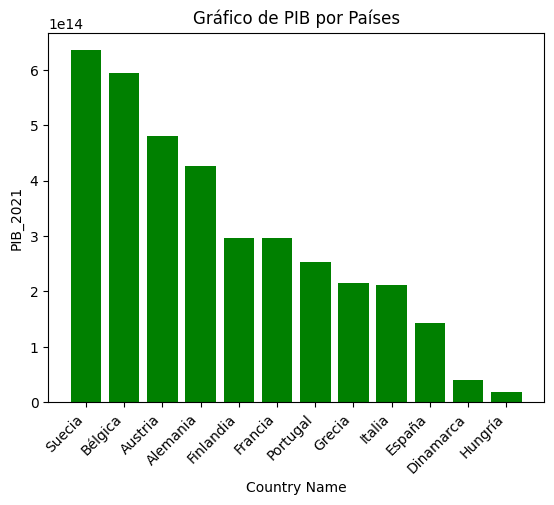

In [85]:
plt.bar(DATABASE_FINAL['Country Name'], DATABASE_FINAL['PIB_2021'], color='green')

plt.xlabel('Country Name')
plt.ylabel('PIB_2021')
plt.title('Gráfico de PIB por Países')

plt.xticks(rotation=45, ha='right')

plt.show()

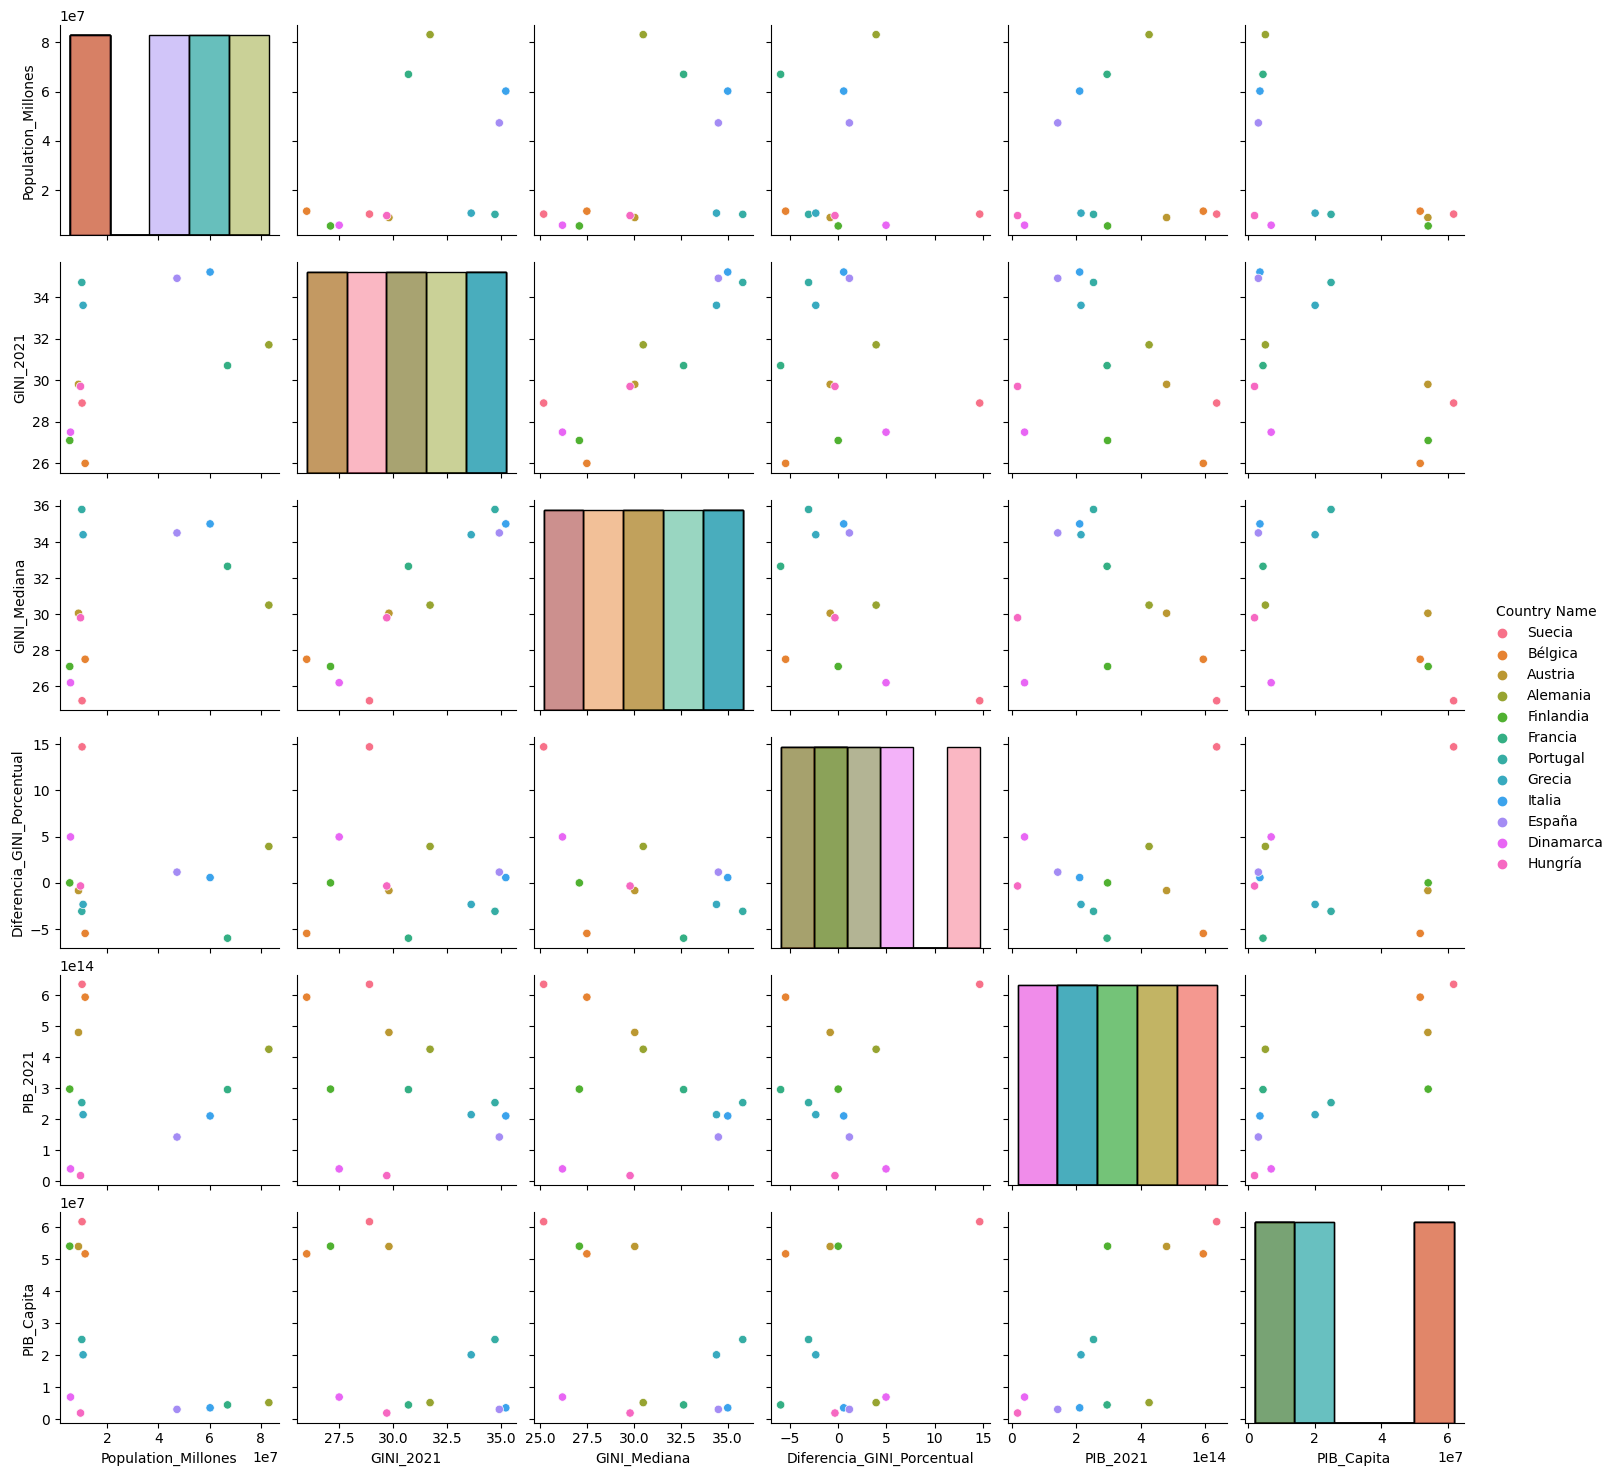

In [86]:
sns.pairplot(DATABASE_FINAL, hue='Country Name', diag_kind='hist')
plt.show()

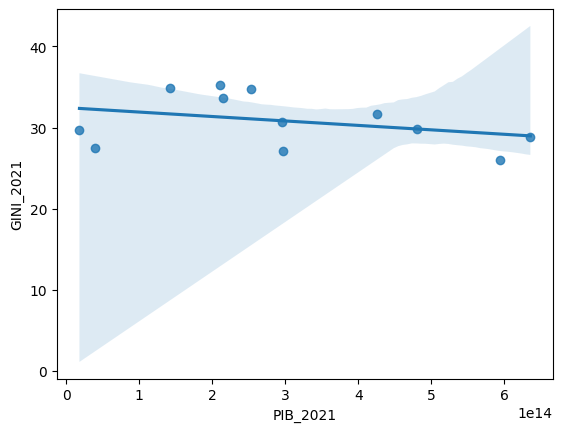

In [87]:
sns.regplot(x='PIB_2021', y='GINI_2021', data= DATABASE_FINAL)

plt.show()

In [88]:
from scipy.stats import pearsonr

In [89]:
pearsonr(DATABASE_FINAL["PIB_2021"].dropna(), DATABASE_FINAL["GINI_2021"].dropna())

PearsonRResult(statistic=-0.34005606952335193, pvalue=0.27946745040093396)

In [90]:
correlacion = DATABASE_FINAL['PIB_2021'].corr(DATABASE_FINAL['GINI_2021'])
print(correlacion)

-0.3400560695233518


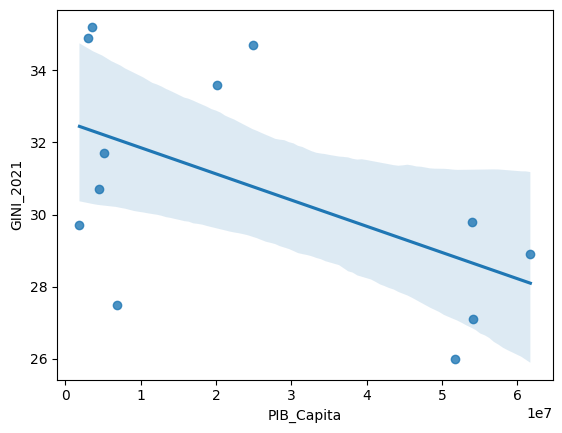

In [91]:
sns.regplot(x='PIB_Capita', y='GINI_2021', data= DATABASE_FINAL)

plt.show()

In [92]:
correlacion = DATABASE_FINAL['PIB_Capita'].corr(DATABASE_FINAL['GINI_2021'])
print(correlacion)

-0.5445390968271105


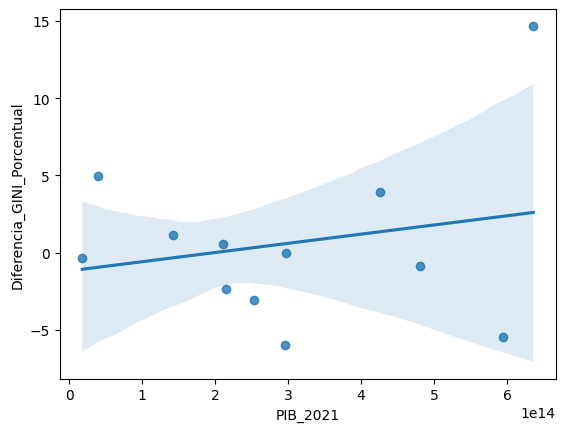

In [93]:
sns.regplot(x='PIB_2021', y='Diferencia_GINI_Porcentual', data= DATABASE_FINAL)

plt.show()

In [94]:
correlacion = DATABASE_FINAL['PIB_2021'].corr(DATABASE_FINAL['Diferencia_GINI_Porcentual'])
print(correlacion)

0.21527466035014944


## Prueba de normalidad y diferencia de varianzas
Tras la evidencia encontrada, se procede a la prueba de normalidad, es decir, conocer si los datos son paramétricos o no y si las varianzas son distintas. Para saber si los datos siguien una distribución normal (campana de Gauss) se realiza la prueba de Shapiro-Wilk. Para conocer la diferencia de varianzas se lleva a cabo la prueba de Barlett. Los resultados muestran que la distribución es normal en el caso del índice de GINI pero no en el del PIB 2021. Dicho lo cual, las varianzas son desiguales, es decir, la ditribución es heterocedástica. EL carácter paramétrico viene determinado por la doble condición; normalidad e igualdad de varainzas (homocedasticidad). Por lo tanto, en este caso se lleva a cabo una prueba de hipótesis típica en distribuciones paramétricas y otra para no paramátricas con el objetivo de extraer conclusiones. El test paramétrica elegido es T- de Student y la no paramétrica U- de Mann Whitney. 

Las hipótesis para ambos test son:
- HO: el índice de GINI no manifiesta cambios significativos en función de los cambios del PIB Per Capita.
- H1: el índice de GINI si manifiesta cambios significativos en función de los cambios del PIB Per Capita.
El resultado de la prueba T- de Student asegura que si hay cambios significativos en el índice de GINI en función de los cambios del PIB Per Capita.
El resultado de la prueba U- de Mann Whitney va en la misma línea, asegurando que si hay cambios significativos en el índice de GINI en función de los cambios del PIB Per Capita. En este caso por la diferencia de medianas.

En términos estasísticos, en ambos casos se rechazan la hipótesis nulas.

In [95]:
Z = DATABASE_FINAL['GINI_2021'].dropna()
W = DATABASE_FINAL['PIB_Capita'].dropna()

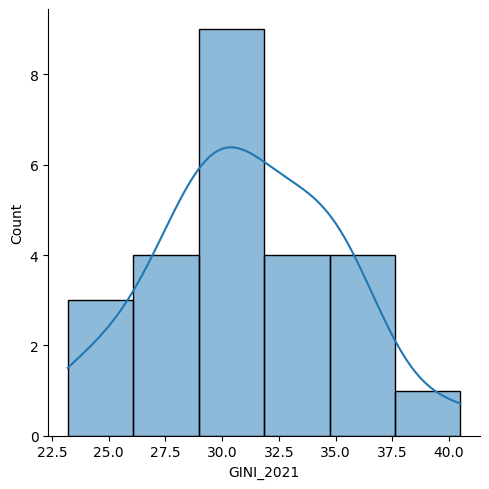

In [96]:
sns.displot(DATABASE['GINI_2021'], kde=True);

In [97]:
# Test de normalidad de Shapiro-Wilk Z
stat, p = stats.shapiro(Z)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p}')

Shapiro-Wilk:
Statistic : 0.9309, p-value : 0.38990890979766846


In [98]:
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")

In [99]:
hypotesis_check(p)

No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal


In [100]:
# Test de normalidad de Shapiro-Wilk Z
stat, p = stats.shapiro(W)
print('Shapiro-Wilk:')
print(f'Statistic : {stat:.4f}, p-value : {p}')
def hypotesis_check(p_value):
    alpha=0.05
    # Decisión en función del p-valor y el nivel de significación
    if p < alpha:
        print("Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal")
    else:
        print("No se puede rechazar la hipótesis nula: la muestra parece seguir una distribución normal")
hypotesis_check(p)

Shapiro-Wilk:
Statistic : 0.7959, p-value : 0.008411592803895473
Rechazar la hipótesis nula: la muestra no parece seguir una distribución normal


In [101]:
from scipy.stats import bartlett

Grupo_1 = DATABASE_FINAL['GINI_2021']
Grupo_2 = DATABASE_FINAL['PIB_Capita']

# Realizar la prueba de Bartlett
stat, p_value = bartlett(Grupo_1, Grupo_2)

print(f"Estadístico de prueba: {stat}")
print(f"Valor p: {p_value}")

Estadístico de prueba: 318.54868832105717
Valor p: 2.99937355008984e-71


In [102]:
# Selección del nivel de significación
alpha = 0.05 

In [103]:
# Decisión en función del p-valor y el nivel de significación

if p_value < alpha:
    print("Rechazar la hipótesis nula: heterocedástica")
else:
    print("No se puede rechazar la hipótesis nula: homocedástica")

Rechazar la hipótesis nula: heterocedástica


In [104]:
# Selección del nivel de significación
alpha = 0.05 

In [105]:
# Calculo del estadístico y p-valor
stat, p = ttest_ind(Grupo_1, Grupo_2)
print(stat,p)

-3.4878241882766927 0.0020840777027274294


In [106]:
# Decisión en función del p-valor y el nivel de significación

if p < alpha:
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre los pesos medios (p-value: {:.4f})".format(p))
else:
    print("No se puede rechazar la hipótesis nula: no hay una diferencia significativa entre los pesos medios (p-value: {:.4f})".format(p))

Rechazar la hipótesis nula: hay una diferencia significativa entre los pesos medios (p-value: 0.0021)


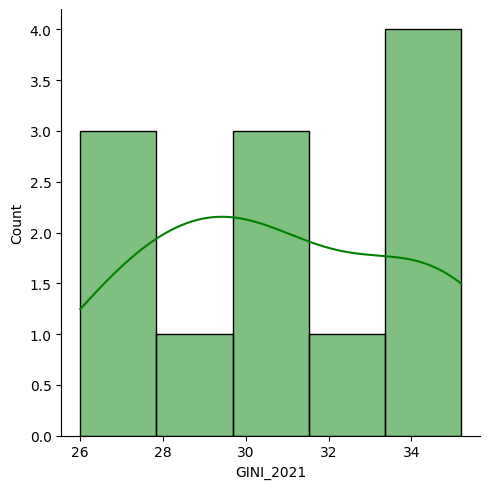

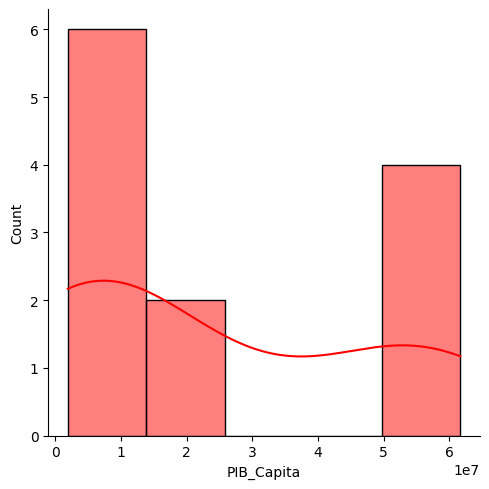

In [107]:
sns.displot(Z, color='green', alpha=0.5, kde=True)
sns.displot(W, color='red', alpha=0.5, kde=True)

In [108]:
U, p_valor = mannwhitneyu(Z, W)

print("Estadístico U: ", U)
print("P-valor: ", p_valor)

Estadístico U:  0.0
P-valor:  3.6584553538971e-05


In [109]:
# Seleccion del nivel de significancia
alpha = 0.05

# Decisión en función del p-valor y el nivel de significación
if p_valor < alpha:
    print("Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: {:.4f})".format(p_valor))
else:
    print("No se puede rechazar la hipótesis nula: las medianas de ambos grupos son iguales (p-value: {:.4f})".format(p_valor))

Rechazar la hipótesis nula: las medianas de ambos grupos son diferentes (p-value: 0.0000)


## Conclusiones
Las conclusiones son las siguientes:
- Tras los estudios realizados, el índice de GINI, que mide el nivel de desigualdad entre las rentas de las personas de un territorio, cambia de manera significativa en función del PIB Per Capita. 
- La relación que existe entre ellos es negativa, es decir, cuando sube el PIB Percapita, baja el indice de GINI, cuando baja el PIB Percapita, sube el indice de GINI.
- Esta relación manifiesta que el crecimiento económico promedio de las personas de un terrirorio, se produce con probabilidad mediante dinámicas de crecimiento generalizado de toda la problación a través de la actividad puramente económica. Nota: hemos de tener en cuenta que el índice de GINI no tiene en cuenta el patrimonio, sino la renta. En otras palabras, que el delta de crecimiento es el agregado del crecimeinto generalizado y no desigual en la economía. De lo contrario, el índice de GINI permanecería estable, subiría, o simplemente no bajaría de manera significativa.
- No se pueden asegurar estos efectos en ciertos coelctivos concretos. La correlación se ha calculado sobre 14 países de la unión europea, ni siquiera completa. Y por lo tanto tampoco a nivel mundial. Este tipo de afirmaciones ayuda a no extrapolar resultados a otras situaciones econoómicas, estructuras o sistemas. De la misma forma, no intuir relaciones causas y efecto, lo que supondría errores, es decir, afiormar que la causa de la reducción de la desigualdad (reducción índice de GINI), se produce por causa del incremento Per Capita del PIB.
No obstante se trata de una relación, dependencia y asociatividad entre estas variables de interés por seguir y tener en cuenta para la puesta en marcha de políticas económicas y sociales, en el marco de los países estudiados.